<a href="https://colab.research.google.com/github/Grumpy-catzZ/Rock-Classical-Music-Classification-using-Logistic-Regression/blob/main/Rock_Classical_Music_Classification_using_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rock / Classical Music Classification using Logistic Regression


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#Data scrapping
Creating a database of rock and classical songs along with their audio features
Using Spotify API and Postman.


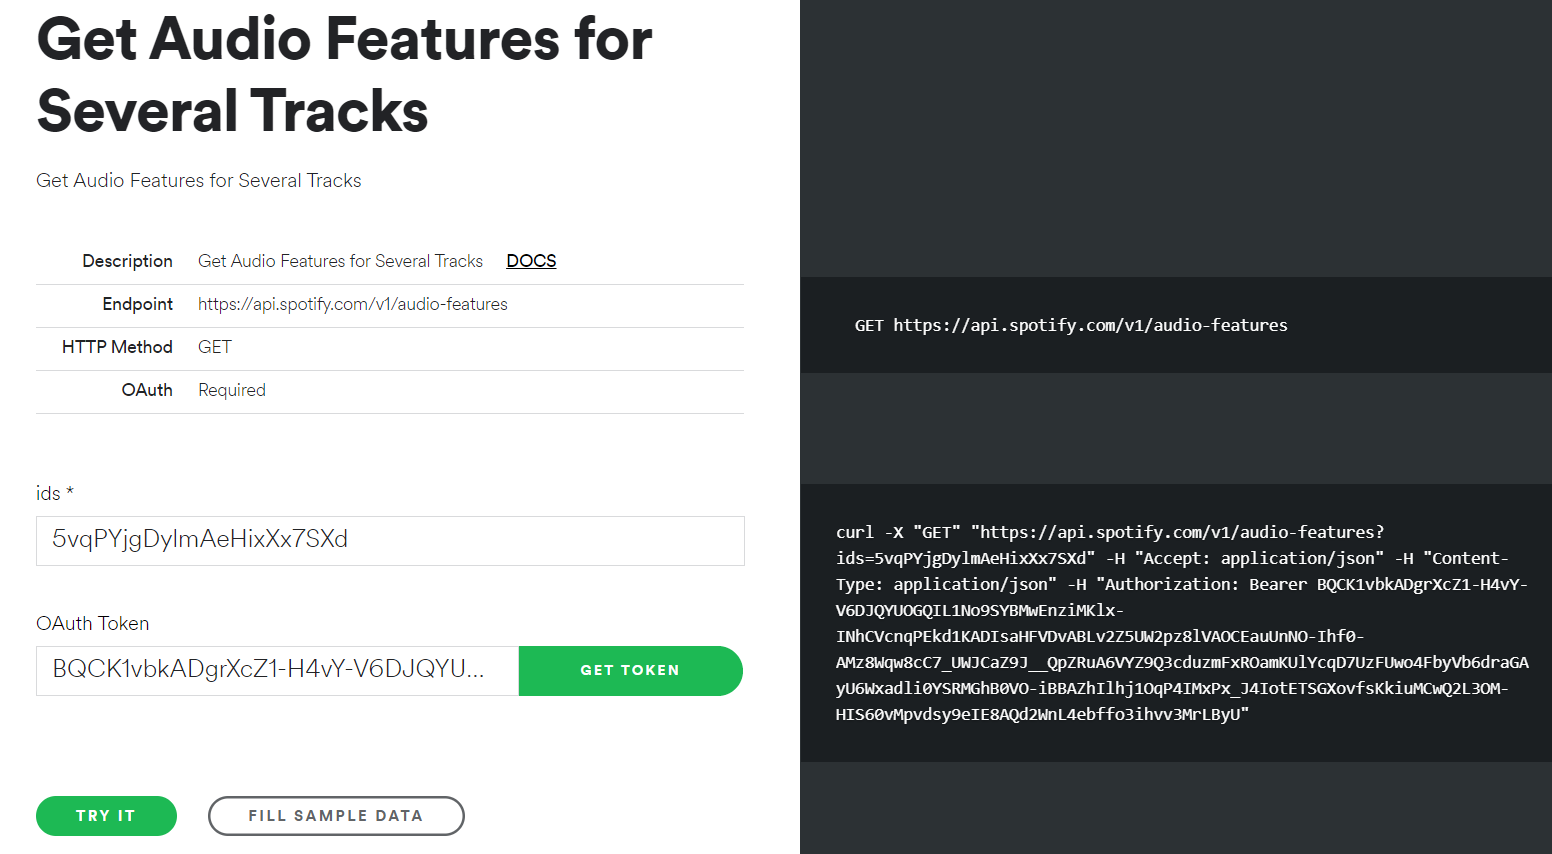

In [ ]:
metal = pd.read_excel('metal.xlsx')
classical = pd.read_excel('classical.xlsx')

metal.head() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.532,0.759,1,-3.842,0,0.0319,0.000123,0.020000,0.073,0.293,95.010,audio_features,1Td7TGT1XtK2ojUjz1mGUV,spotify:track:1Td7TGT1XtK2ojUjz1mGUV,https://api.spotify.com/v1/tracks/1Td7TGT1XtK2...,https://api.spotify.com/v1/audio-analysis/1Td7...,244365,4
1,0.497,0.916,7,-3.323,1,0.1080,0.000323,0.000000,0.360,0.401,96.051,audio_features,3aniWcwiiYKHpm3F5TdeKD,spotify:track:3aniWcwiiYKHpm3F5TdeKD,https://api.spotify.com/v1/tracks/3aniWcwiiYKH...,https://api.spotify.com/v1/audio-analysis/3ani...,215004,4
2,0.366,0.976,6,-5.481,1,0.1130,0.000035,0.000523,0.270,0.217,169.982,audio_features,1iYuyIY76lni7UtucnXwWK,spotify:track:1iYuyIY76lni7UtucnXwWK,https://api.spotify.com/v1/tracks/1iYuyIY76lni...,https://api.spotify.com/v1/audio-analysis/1iYu...,262427,4
3,0.554,0.976,2,-2.756,1,0.1170,0.000482,0.000005,0.281,0.256,101.541,audio_features,4oFKxRhqn3yggXFRqZPxWU,spotify:track:4oFKxRhqn3yggXFRqZPxWU,https://api.spotify.com/v1/tracks/4oFKxRhqn3yg...,https://api.spotify.com/v1/audio-analysis/4oFK...,237662,4
4,0.438,0.973,6,-3.385,1,0.0833,0.000005,0.000003,0.244,0.715,145.058,audio_features,1pXq5WSNCbRvUJ5VnqAjIk,spotify:track:1pXq5WSNCbRvUJ5VnqAjIk,https://api.spotify.com/v1/tracks/1pXq5WSNCbRv...,https://api.spotify.com/v1/audio-analysis/1pXq...,194897,4


In [ ]:
classical.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.453,0.695,10,-10.953,1,0.0554,0.0223,0.962,0.1170,0.1260,70.425,audio_features,4AD2dterIUjNt1LFNI9Bvi,spotify:track:4AD2dterIUjNt1LFNI9Bvi,https://api.spotify.com/v1/tracks/4AD2dterIUjN...,https://api.spotify.com/v1/audio-analysis/4AD2...,90427,4
1,0.144,0.132,10,-19.115,1,0.0333,0.9460,0.779,0.1150,0.0627,102.283,audio_features,2TZbQZXOuR8osP2AK8yYMN,spotify:track:2TZbQZXOuR8osP2AK8yYMN,https://api.spotify.com/v1/tracks/2TZbQZXOuR8o...,https://api.spotify.com/v1/audio-analysis/2TZb...,207427,3
2,0.334,0.218,9,-18.612,1,0.0330,0.5920,0.101,0.1040,0.0395,138.077,audio_features,1ucCVtG5dKmgvCnXHAnhR9,spotify:track:1ucCVtG5dKmgvCnXHAnhR9,https://api.spotify.com/v1/tracks/1ucCVtG5dKmg...,https://api.spotify.com/v1/audio-analysis/1ucC...,254293,4
3,0.201,0.475,11,-10.097,0,0.0417,0.6590,0.916,0.0748,0.0398,73.563,audio_features,50csT5Qb2qOF7lHdDQ1Sbx,spotify:track:50csT5Qb2qOF7lHdDQ1Sbx,https://api.spotify.com/v1/tracks/50csT5Qb2qOF...,https://api.spotify.com/v1/audio-analysis/50cs...,158333,3
4,0.402,0.046,5,-22.779,1,0.0330,0.9790,0.513,0.0771,0.0967,104.425,audio_features,1ijrMIqQvZNsnoqGukPzFD,spotify:track:1ijrMIqQvZNsnoqGukPzFD,https://api.spotify.com/v1/tracks/1ijrMIqQvZNs...,https://api.spotify.com/v1/audio-analysis/1ijr...,159667,4


In [ ]:
metal.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,0.457633,0.928967,4.766667,-4.42300,0.566667,0.098020,0.006022,0.021503,0.232673,0.343967,123.316433,214727.800000,4.0
std,0.081630,0.057694,2.932380,1.36656,0.504007,0.055263,0.019219,0.106277,0.140103,0.141122,28.620380,26806.689662,0.0
min,0.219000,0.759000,0.000000,-8.16900,0.000000,0.031900,0.000005,0.000000,0.070200,0.125000,75.035000,141608.000000,4.0
25%,0.423500,0.897000,2.000000,-5.17175,0.000000,0.060400,0.000066,0.000002,0.097750,0.245500,97.037250,197185.750000,4.0
50%,0.472000,0.948500,5.500000,-4.38250,1.000000,0.078750,0.000344,0.000013,0.238000,0.313500,134.985000,216886.000000,4.0
75%,0.499250,0.972750,6.750000,-3.33850,1.000000,0.118500,0.001270,0.000607,0.333750,0.426500,145.045500,234854.000000,4.0
max,0.641000,0.995000,10.000000,-2.23400,1.000000,0.253000,0.090200,0.583000,0.571000,0.715000,169.982000,262427.000000,4.0


In [ ]:
classical.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.272467,0.230307,4.600000,-17.590633,0.633333,0.040107,0.717177,0.69004,0.117550,0.123250,98.825733,242983.766667,3.500000
std,0.137731,0.182731,3.409925,5.341771,0.490133,0.006365,0.282624,0.30521,0.057296,0.144981,28.889106,113088.011019,0.937715
min,0.079000,0.023400,0.000000,-32.130000,0.000000,0.033000,0.022300,0.01410,0.045200,0.036000,52.193000,51800.000000,1.000000
25%,0.152250,0.091425,2.000000,-20.262250,0.000000,0.036125,0.595500,0.53250,0.082925,0.041700,77.530750,163510.250000,3.000000
50%,0.235500,0.177000,4.500000,-17.142500,1.000000,0.039050,0.831500,0.83150,0.108000,0.078800,97.336500,221547.000000,4.000000
75%,0.385000,0.345250,7.000000,-14.626250,1.000000,0.041650,0.932750,0.91325,0.124750,0.122750,117.149250,308120.500000,4.000000
max,0.577000,0.695000,11.000000,-8.188000,1.000000,0.061000,0.991000,0.97000,0.310000,0.764000,173.599000,529947.000000,4.000000


###Are these features inherintely different? Do they successfully differentiate two songs from different genres ?

> Breif description of all features is available @ https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

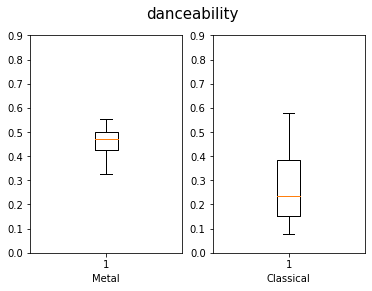

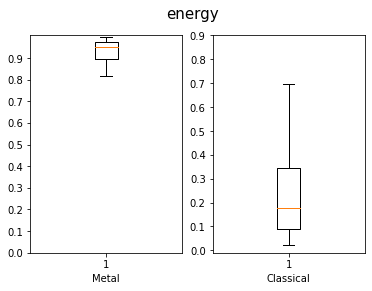

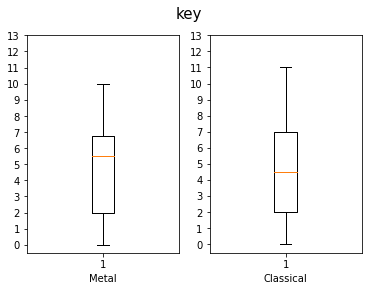

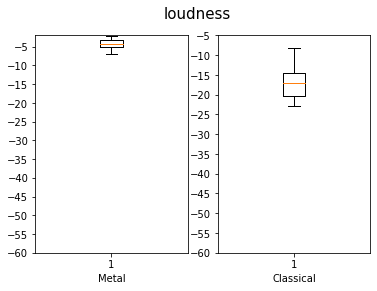

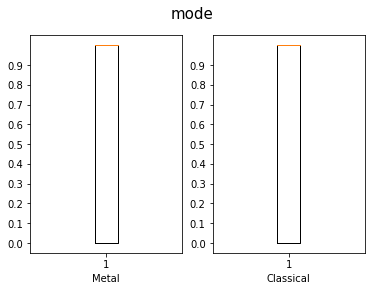

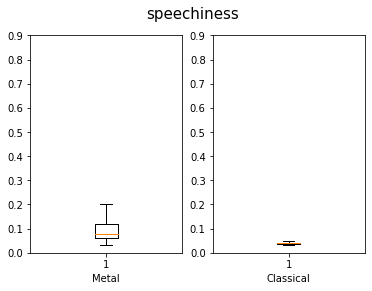

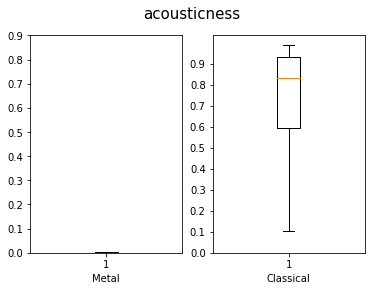

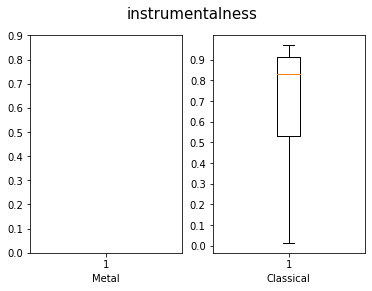

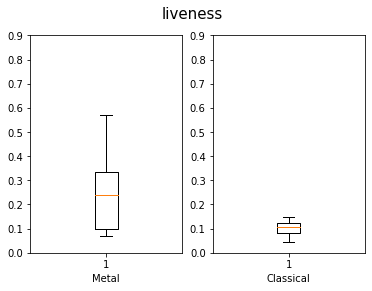

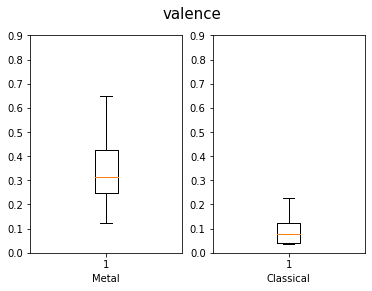

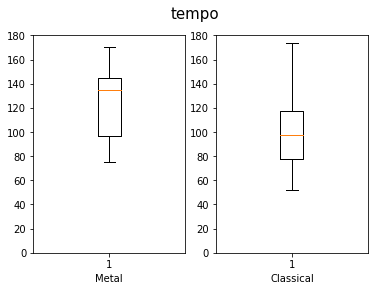

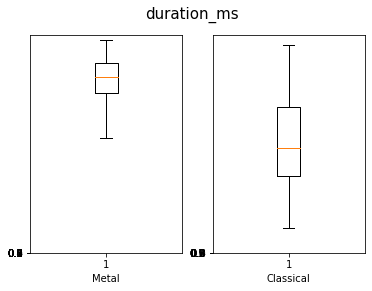

In [ ]:
#basic cleaning
metal  = metal.drop(columns = ['type','uri', 'track_href', 'analysis_url', 'id'] )
classical  = classical.drop(columns = ['type','uri', 'track_href', 'analysis_url','id'] )

#plotting box plots together with same scale on y-axis
for i in range( 0 , metal.shape[1]-1):
  fig ,ax = plt.subplots(1,2)
  ax[0].boxplot( metal.iloc[ :, i], showfliers=False)
  ax[1].boxplot(classical.iloc[:,i] , showfliers=False)
  #following step is necessary to ensure y axis has same range to make comparision easier. 
  if i == 2:
    ax[0].set_yticks(np.arange(0, 14 , 1))
    ax[1].set_yticks(np.arange(0, 14 , 1))
  elif i ==3:
    ax[0].set_yticks(np.arange(-60,0, 5))
    ax[1].set_yticks(np.arange(-60,0, 5))
  elif i == 10:
    ax[0].set_yticks(np.arange(0,200, 20))
    ax[1].set_yticks(np.arange(0,200, 20))
  else:  
    ax[0].set_yticks(np.arange(0,1, 0.1))
    ax[1].set_yticks(np.arange(0,1, 0.1))

  ax[0].set_xlabel('Metal')  
  ax[1].set_xlabel('Classical')
  fig.suptitle(metal.columns[i] , fontsize=  15)

##OBSERVATIONS
Most of the features are very different ,hence they are valid features for our logistic regression.

Note: 

key - Categorical variables, we won't drop it. Rather we will scale it between 0 and 1 and continue to use it.
As per definition of key - "Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on."
How do we interpret its eucledian distance? Simple, a large distance would imply large pitch difference and vice versa. 

mode  - not significant difference, can be dropped


loudness  - scaling required


duration_ms , tempo - too big values need to be scaled 


#Data Preprocessing

label 1 for metal and 0 for classical and then combining them to create a single dataframe

In [ ]:
metal['class'] = 1
classical['class'] = 0 

data = pd.concat([metal ,classical] , ignore_index=True)

In [ ]:
#Dropping irrelevant features
data = data.drop(columns = ['mode' , 'time_signature', 'type', 'id', 'uri', 'track_href', 'analysis_url'])

In [ ]:
#Creating Train and Test datasets 
#keeping in mind index 0-29 is metal and 30-59 is classical, so first we shuffle all rows. 

data = data.sample(frac=1).reset_index(drop=True)  # shuffling it once is enough 

test_size = int(data.shape[0]*0.2)  #20% as test size
test =  data.loc[          : test_size]
train = data.loc[ test_size:          ]


In [ ]:
#From Spotify Documentaion , all relevant features except : key, loudness, tempo, duration_ms are will always lie between 0 and 1. 
#Hence we will apply feature scaling - Min Max Scaling on these features to get value between 0 and 1.  


In [ ]:
#Perform Min Max Scaling
# method not working :(
'''   
cols = [2,3,9,10] #column index of features that need to be scaled
scaled_features = pd.DataFrame(columns=['key_scaled' , 'loudness_scaled','tempo_scaled','duration_ms_scaled'])
for i , j in zip(cols,range(0,4)):
  x = df_metal.iloc[: ,i]
  numo = np.subtract(x , np.min(x))
  deno = np.subtract(np.max(x) , np.min(x))
  scaled_features.columns.values[j] = pd.Series(np.divide(numo ,deno))'''

##MinMax Scaling

In [ ]:

scaled_features_train = [[],[],[],[]]
scaled_features_test = [[],[],[],[]]
cols = [2,3,9,10]    #column index of features that need to be scaled
for i , j in zip(cols,range(0,4)):
  x = train.iloc[: ,i]
  y = test.iloc[: , i]
  numo = np.subtract(x , np.min(x))
  deno = np.subtract(np.max(x) , np.min(x))
  scaled_features_train[j] = pd.Series(np.divide(numo ,deno))
  scaled_features_test[j] = pd.Series(np.divide(np.subtract(y,np.min(x)) ,deno))


train['key_scaled'] , test['key_scaled'] = scaled_features_train[0] , scaled_features_test[0] 
train['loudness_scaled'] , test['loudness_scaled'] = scaled_features_train[1] , scaled_features_test[1] 
train['tempo_scaled'] , test['tempo_scaled'] = scaled_features_train[2] , scaled_features_test[2] 
train['duration_ms_scaled'] , test['duration_ms_scaled'] = scaled_features_train[3] , scaled_features_test[3] 




In [ ]:
train_scaled = train.drop(columns =['key' , 'loudness' , 'tempo' , 'duration_ms'])
test_scaled  = test.drop(columns =['key' , 'loudness' , 'tempo' , 'duration_ms'])

In [ ]:
#x0 is the bias
train_scaled['x0'] = 1                     
test_scaled['x0']  = 1

#creating required train test splits
X_train = train_scaled.drop(columns = ['class'])
Y_train = train_scaled['class']
X_test  = test_scaled.drop(columns = ['class'])
Y_test  = test_scaled['class']



Our train and test dataset is ready. 
Now lets do some machine learning!

#Machine Learning

In [ ]:
def sigmoid(z):
    x = 1/(1+np.exp(-z))
    return x

In [ ]:
def calculate_cost(h,y,m):
  cost = -(1/m)*np.sum(y*np.log2(h) + (1-y)*np.log2(1-h))
  return float(cost)

In [ ]:
W = np.zeros((12,))
m = data.shape[0]
alpha = 0.06
iterations = 3000

In [ ]:
X_train.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'key_scaled',
       'loudness_scaled', 'tempo_scaled', 'duration_ms_scaled', 'x0'],
      dtype='object')

In [ ]:
cost = []
W_list = []


for y in range(iterations):
  prediction = sigmoid(np.dot(X_train,W))
  cost.append(calculate_cost(prediction,Y_train,m))
  W = W - (1/m)*alpha*(X_train.T.dot((prediction - Y_train)))

W_list.append(W)

## Cost v/s Iterations

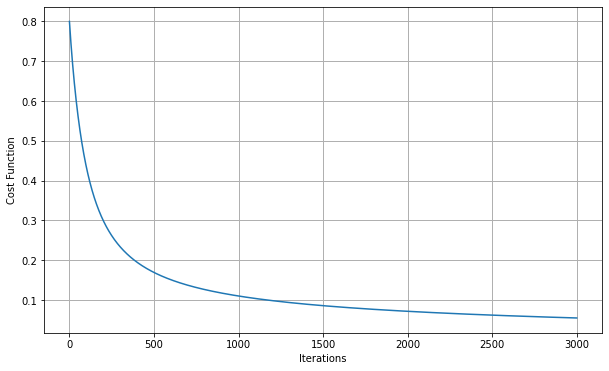

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))
plt.grid(linestyle='-', linewidth=1)
plt.plot(range(iterations),cost)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

In [ ]:
#Final cost after 3000 iterations, 
cost[-1]

0.05510756406720978

#Evaluating the model

plot coefficients here

##Confusion Matrix

In [ ]:
#Using generic threshold level of 0.5

Yp = sigmoid(np.dot(X_test,W))
tp,fp,fn,tn = 0,0,0,0
for i in range(12) :
  if (Yp[i]>0.5):
    if (Y_test[i]==1):
      tp+=1
    else:
      fp=+1
  else:
    if (Y_test[i]==0):
      tn+=1
    else:
      fn+=1

print(tp,fp,tn,fn)

5 0 7 0


In [ ]:
confusion_matrix= np.array([[tp,fp],[fn,tn]])
confusion_matrix                     

array([[5, 0],
       [0, 7]])

##ROC Curve

In [ ]:
#calculating data to plot ROC curve. 
sensitivity = []
xdata = []
Yp = sigmoid(np.dot(X_test,W))

for j in range(0,100,5):
  tp,fp,fn,tn = 0,0,0,0
  for i in range(test_size) :
    
    if (Yp[i]>(j/100)):
      
      if (Y_test[i]==1):
        tp+=1
      else:
        fp=+1
    
    else:
     
      if (Y_test[i]==0):
        tn+=1
      else:
        fn+=1

  sensitivity.append(np.divide(tp,(tp+fn)))
  xdata.append(np.divide(fp,(fp+tn)))

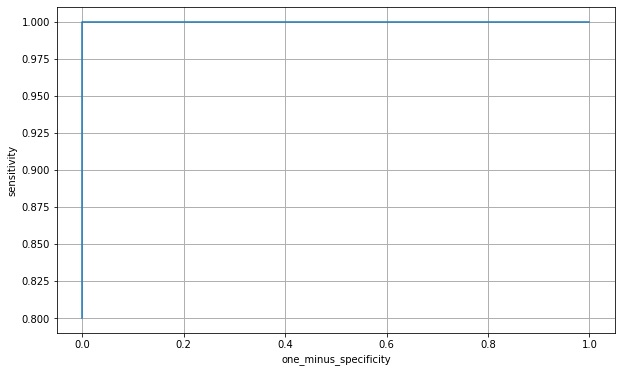

In [ ]:
#plotting ROC curve 
fig , ax = plt.subplots(figsize=(10,6))
plt.grid(linestyle='-', linewidth=1)
plt.plot( xdata , sensitivity)
plt.xlabel('one_minus_specificity')
plt.ylabel('sensitivity')
plt.show()

### Our model performs extremely well! AUC = 1 :)  

Mostly because our dataset is very small. Nevertheless, we have successfully created a classifier using logistic regression. 